### Columns description

1. anaemia:Decrease of red blood cells or hemoglobin (boolean)
2. creatinine_phosphokinase:Level of the CPK enzyme in the blood (mcg/L)
3. diabetes:If the patient has diabetes (boolean)
4. ejection_fraction:Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction
5. high_blood_pressure:blood hypertension
6. platelets:are a component of blood whose function (along with the coagulation factors)
7. serum_creatinine:Serum creatinine is widely interpreted as a measure only of renal function
8. serum_sodium: to see how much sodium is in your blood it is particularly important for nerve and muscle function.

# 1. Import library

In [5]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# 2. Data Analysis

In [6]:
train = pd.read_csv('heart_failure_clinical_records_dataset.csv')
train.head(6)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


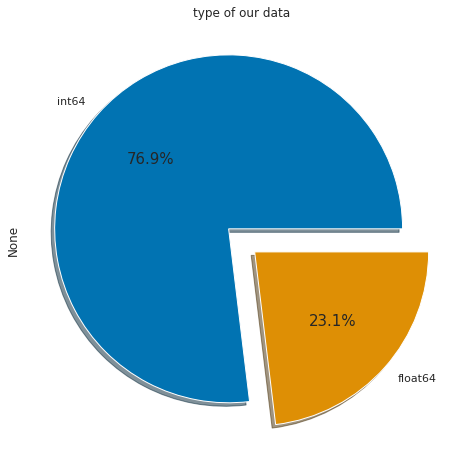

In [4]:

train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

In [8]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
train.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

# 3. Finding missing values

In [10]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 4. Visualization

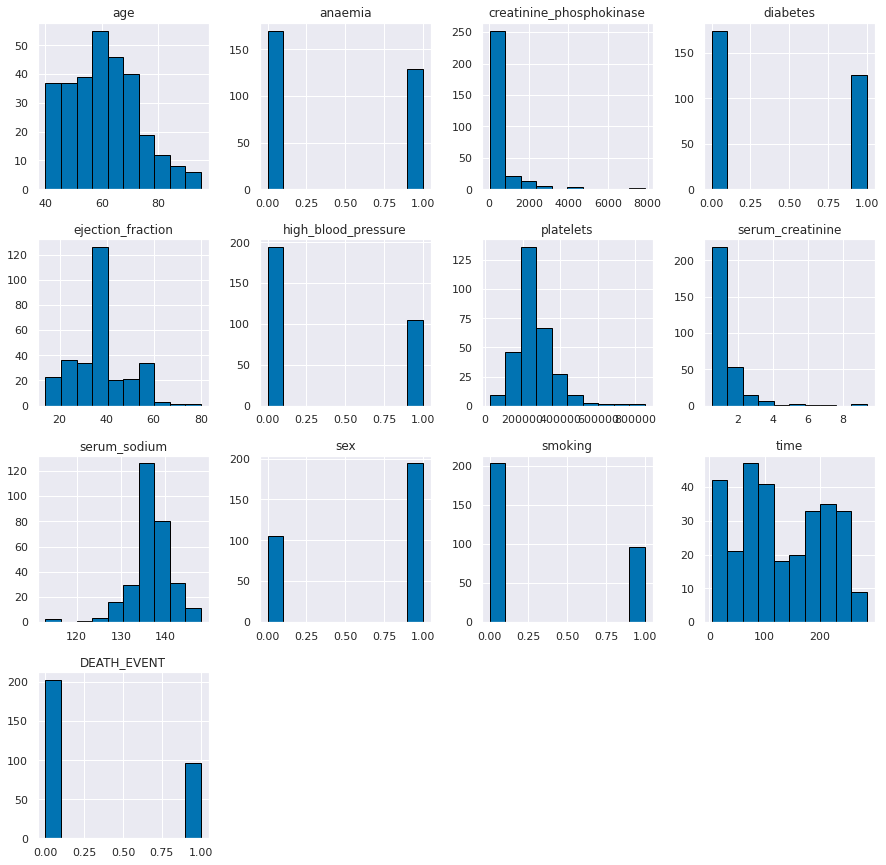

In [8]:
train.hist(figsize=(15,15),edgecolor='black');

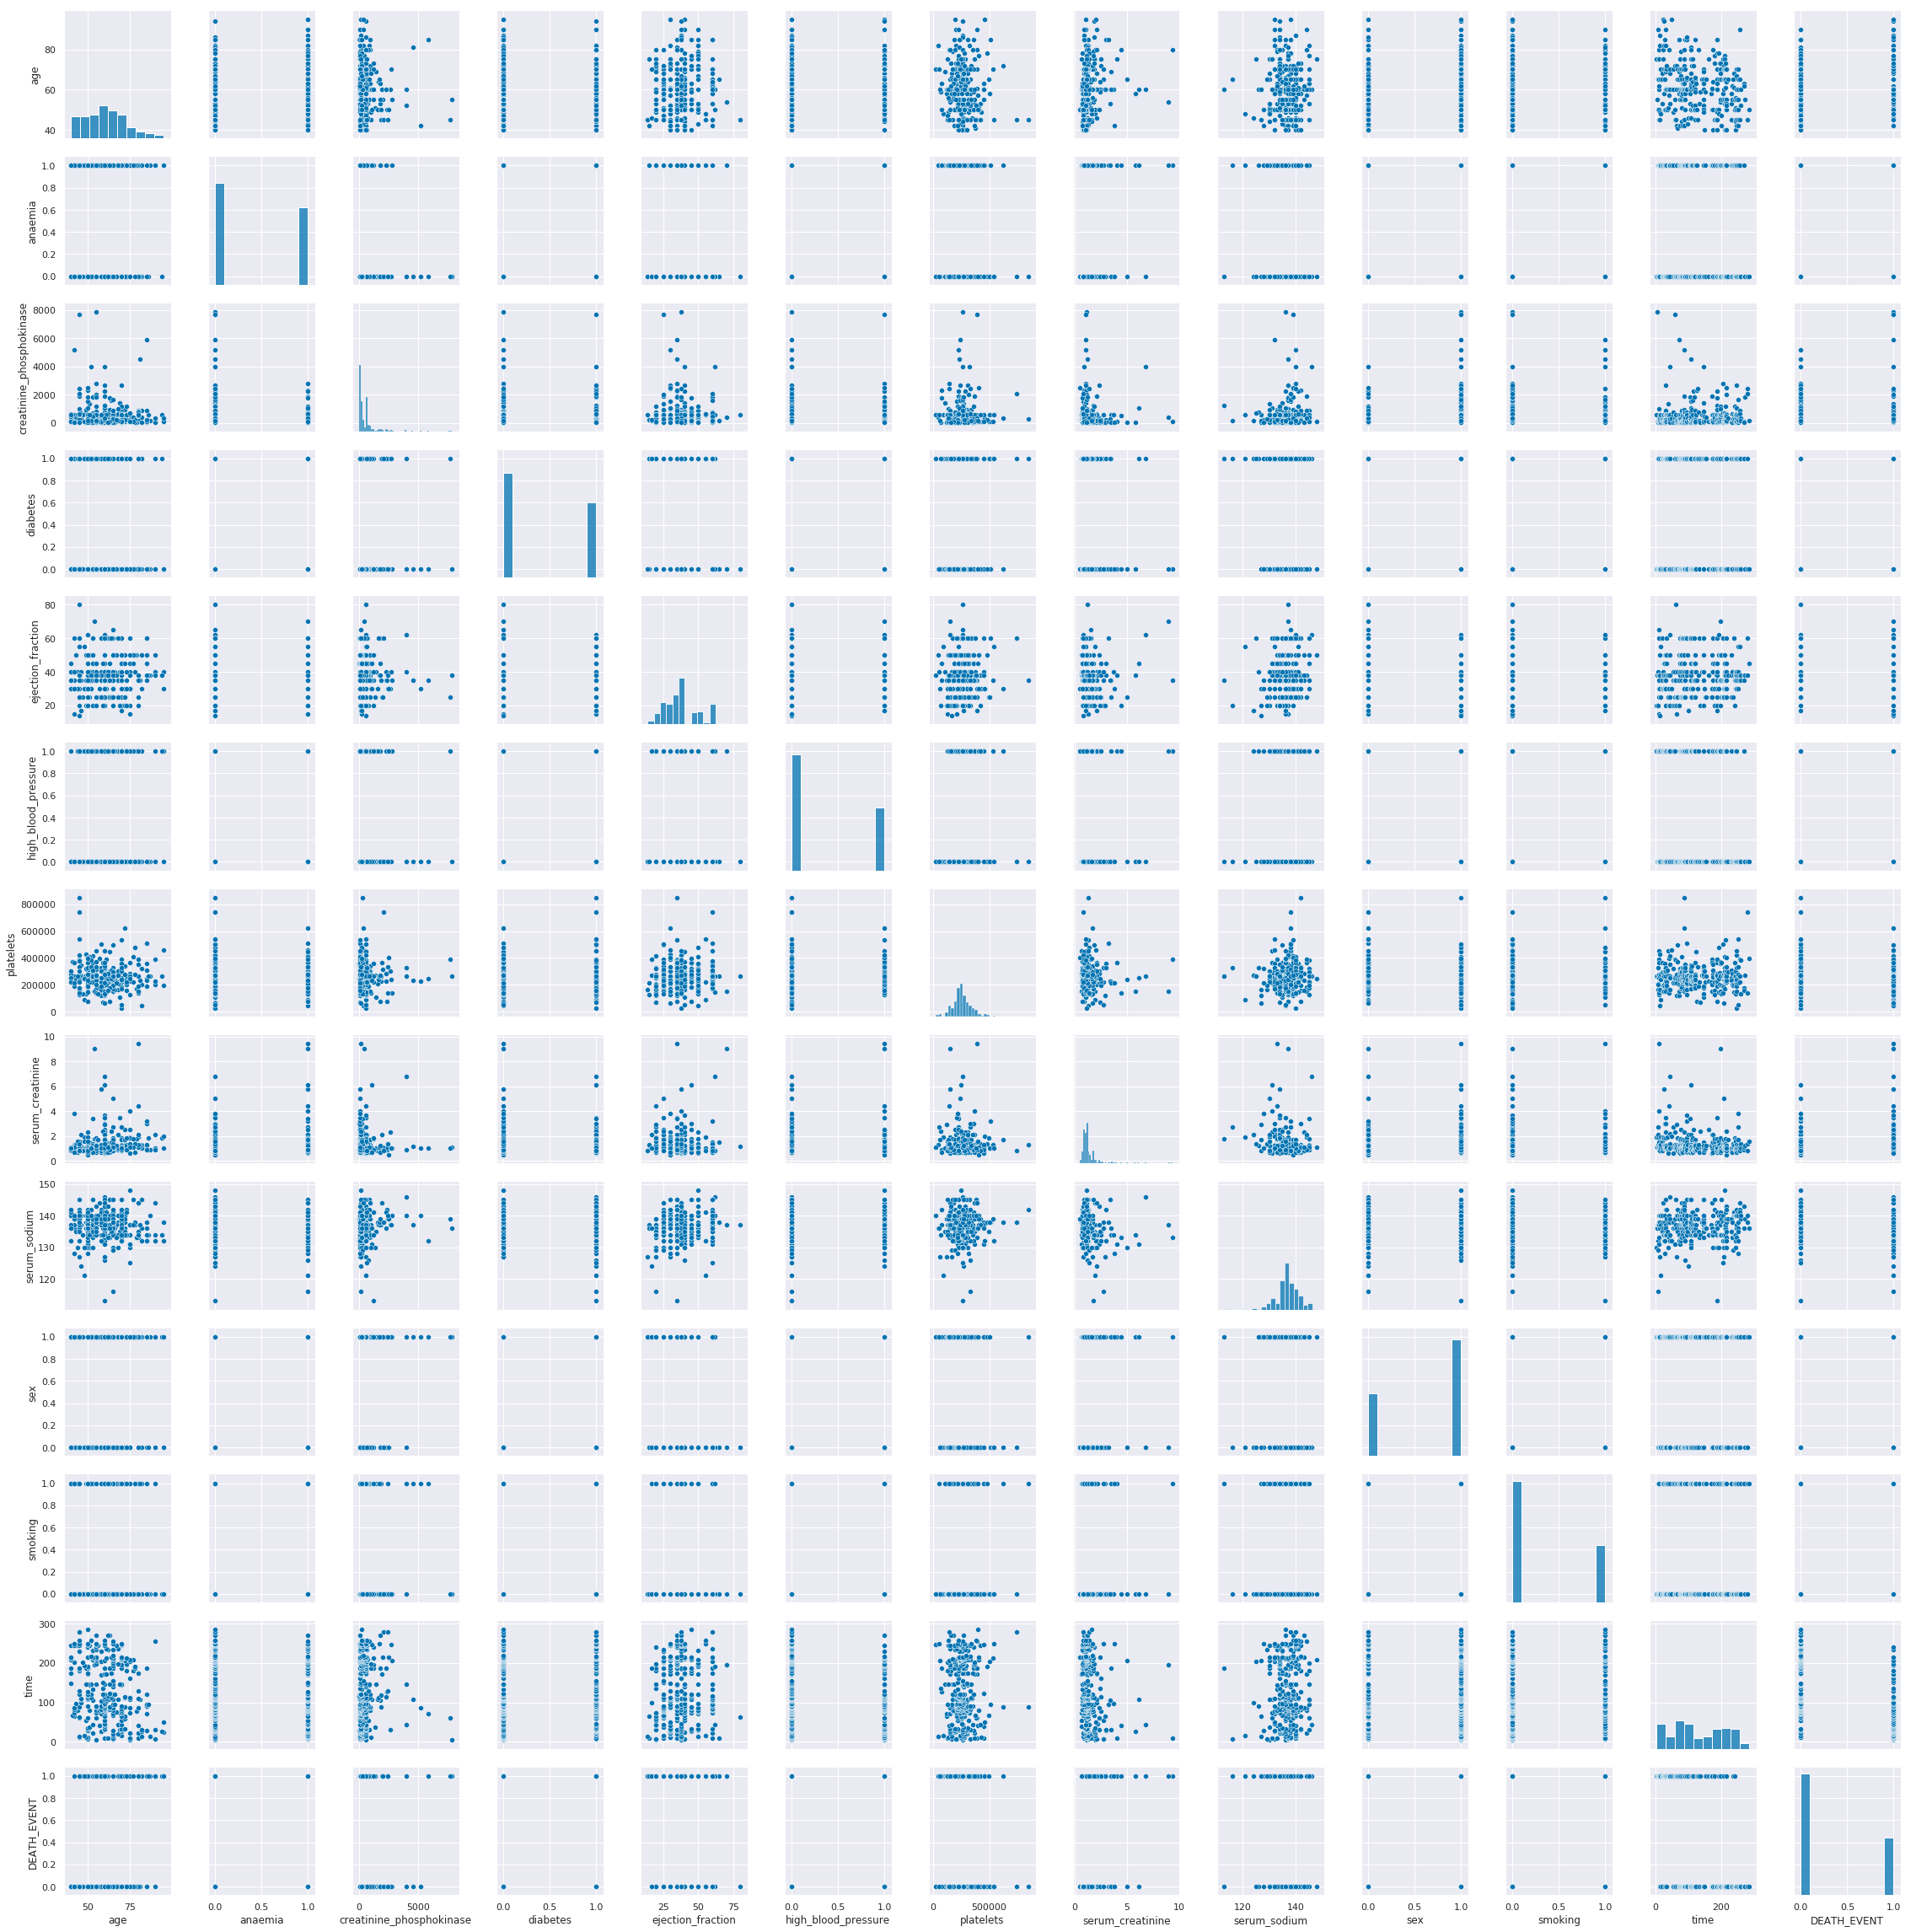

In [14]:
sns.pairplot(train) 
plt.show()

### Death Events

Text(0.5, 1.0, 'the % of deaths')

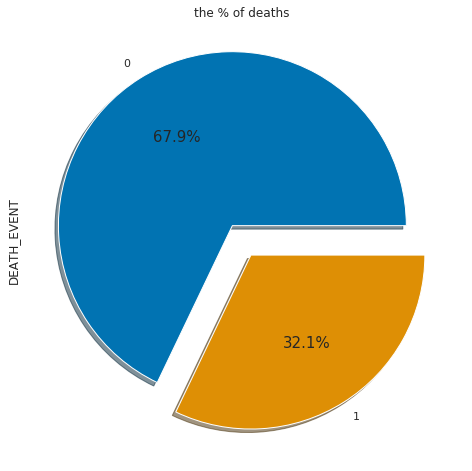

In [15]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

### Age

Text(0.5, 1.0, 'the ages of our persone')

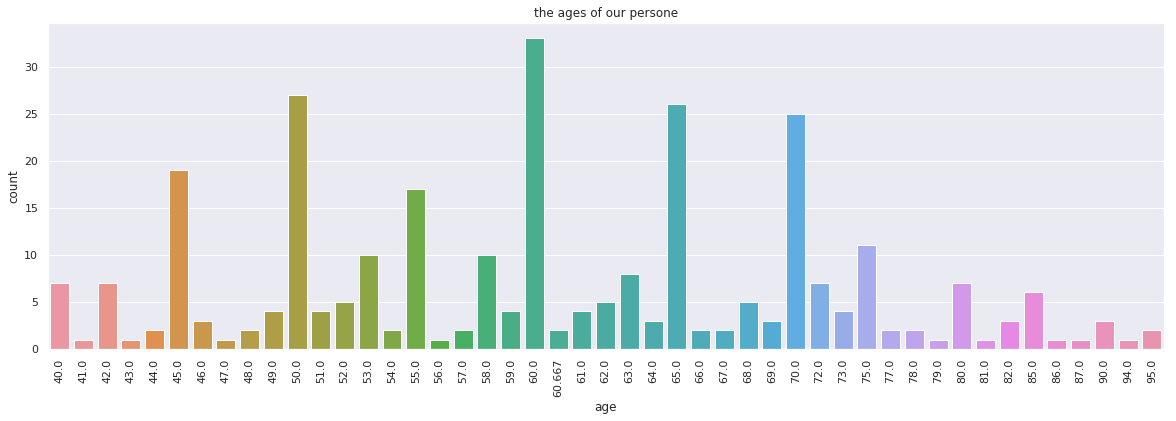

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('the ages of our persone')

In [17]:
# Distribution of Age


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

In [18]:
# Distribution of AGE Vs DEATH_EVENT

fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()

### Sex

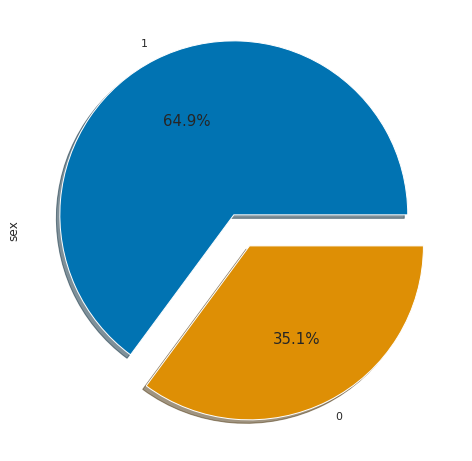

In [19]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

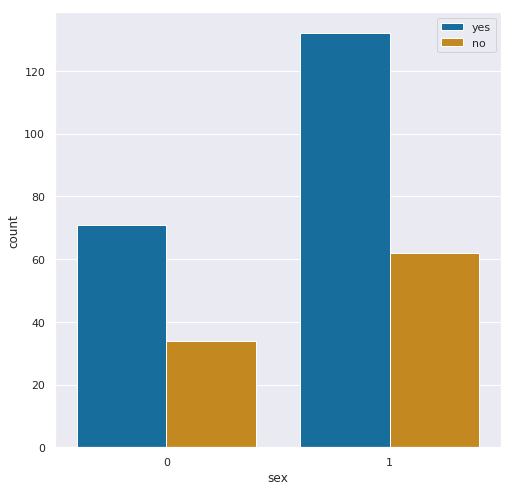

In [20]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

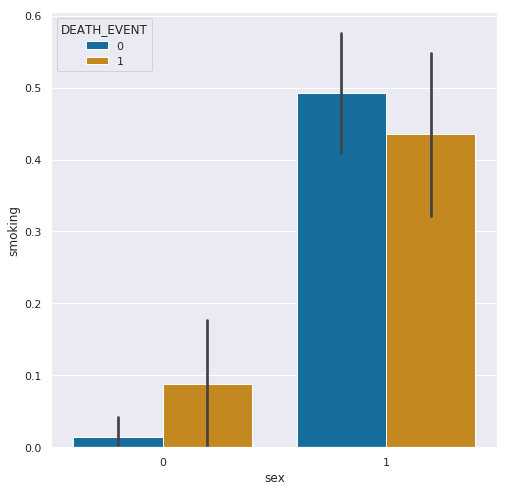

In [22]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

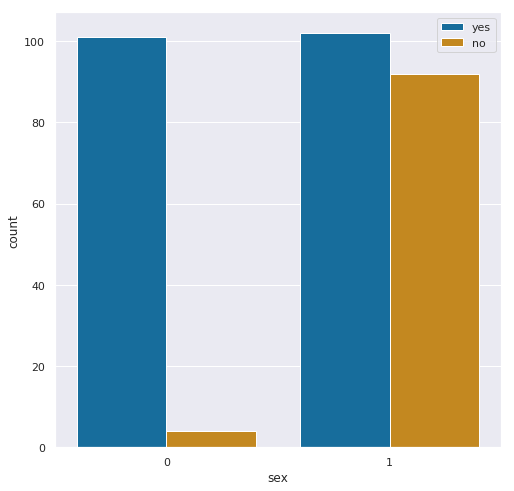

In [23]:
sns.countplot(x='sex',hue='smoking',data=train)
plt.legend(['yes','no']);

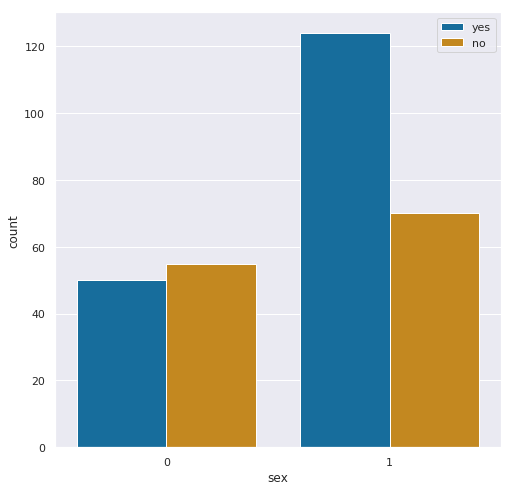

In [24]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

### Diabetes

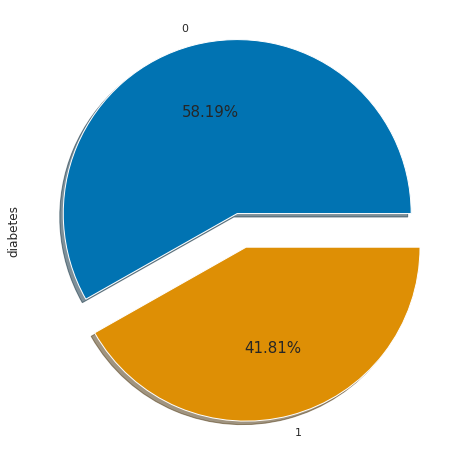

In [25]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%2.2f%%',shadow=True)

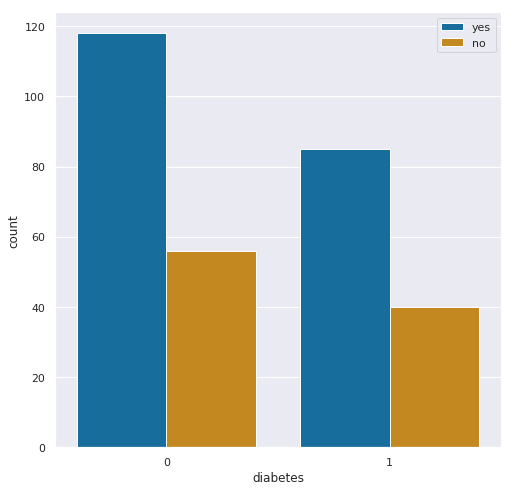

In [26]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

### Ejection_fraction


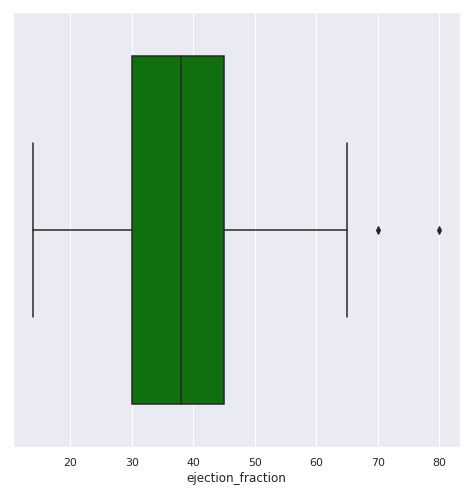

In [27]:
sns.boxplot(x = train.ejection_fraction, color = 'green')
plt.show()

We can see there are two outliers. Lets remove them (70 and 80) 

In [28]:
train[train['ejection_fraction']>=70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [29]:
train = train[train['ejection_fraction']<70]

In [30]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()

### Time

## Features selection 

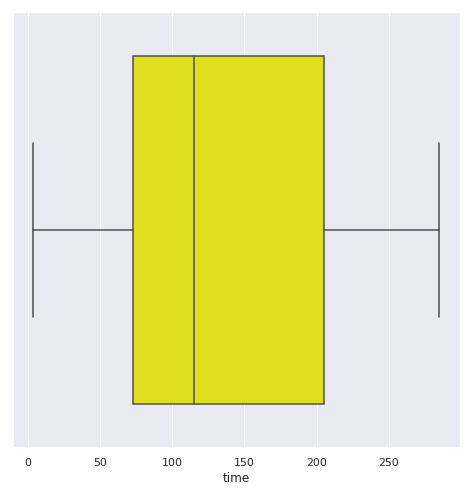

In [31]:
sns.boxplot(x=train.time, color = 'yellow')
plt.show()

No outliers in time 

### Ejection_fraction

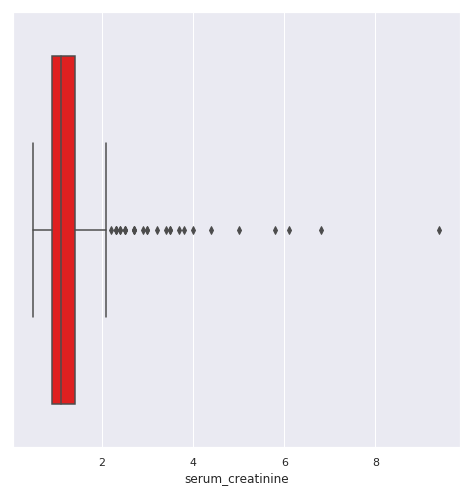

In [32]:
sns.boxplot(x=train.serum_creatinine, color = 'red')
plt.show()

In [33]:
# Before dealing with outliers we require knowledge about the outlier,
# the dataset and possibly some domain knowledge.

# Removing outliers without a good reason will not always increase accuracy.
#Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

# When I researched a bit I found that all the values
# in serum_creatinine falls in possible range of values.So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT.

## Feature selection

In [34]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/home/idiomsc0de/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



[0.09746737 0.02691889 0.06884992 0.03246599 0.14382115 0.02545767
 0.070818   0.10935211 0.08141953 0.02501843 0.02877616 0.28963479]


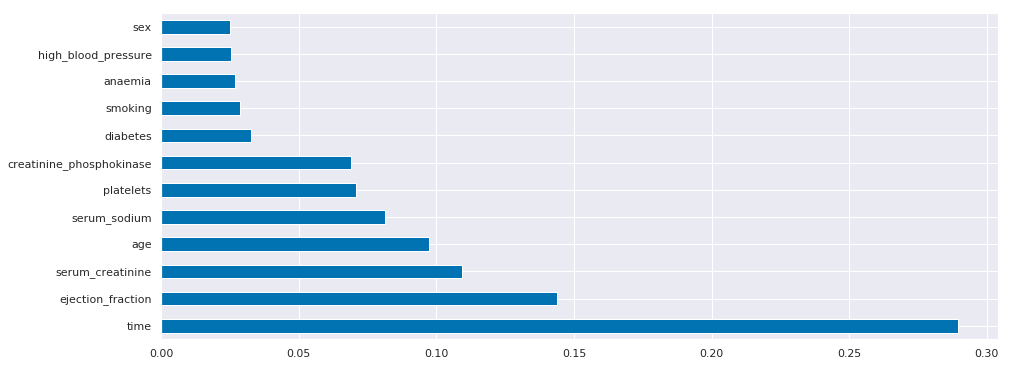

In [35]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Like we can c that some of our feature had a corrolation almost aqual to 0 so we gonna drop them like :
* anaemia
* creatinine_phosphokinase
* diabetes
* high_blood_pressure
* platelets
* sex
* smoking


We will select only 3 features : time, ejection_fraction, serum_creatinine 

In [36]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [37]:
train

ejection_fraction  serum_creatinine  serum_sodium  time  DEATH_EVENT
0                   20               1.9           130     4            1
1                   38               1.1           136     6            1
2                   20               1.3           129     7            1
3                   20               1.9           137     7            1
4                   20               2.7           116     8            1
..                 ...               ...           ...   ...          ...
294                 38               1.1           143   270            0
295                 38               1.2           139   271            0
296                 60               0.8           138   278            0
297                 38               1.4           140   280            0
298                 45               1.6           136   285            0

[297 rows x 5 columns]

In [38]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/home/idiomsc0de/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



##  Split Data

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [40]:
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT

In [41]:
print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [43]:
print(x_train)
print(y_test)

     ejection_fraction  serum_creatinine  serum_sodium  time
50                  25               1.0           138    43
57                  40               0.6           138    54
126                 17               2.1           124   100
63                  35               1.0           145    61
100                 25               1.1           141    87
..                 ...               ...           ...   ...
270                 30               1.6           130   244
27                  45               1.3           136    26
2                   20               1.3           129     7
204                 40               0.7           137   187
281                 40               2.7           136   250

[207 rows x 4 columns]
86     0
213    1
298    0
288    0
216    0
      ..
39     1
83     0
190    0
290    0
43     0
Name: DEATH_EVENT, Length: 90, dtype: int64


## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 1. Logistic Regression

[[58  6]
 [10 16]]
0.8222222222222222


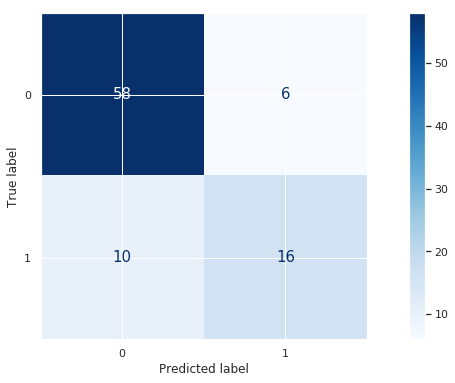

In [89]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()


## 2. KNN

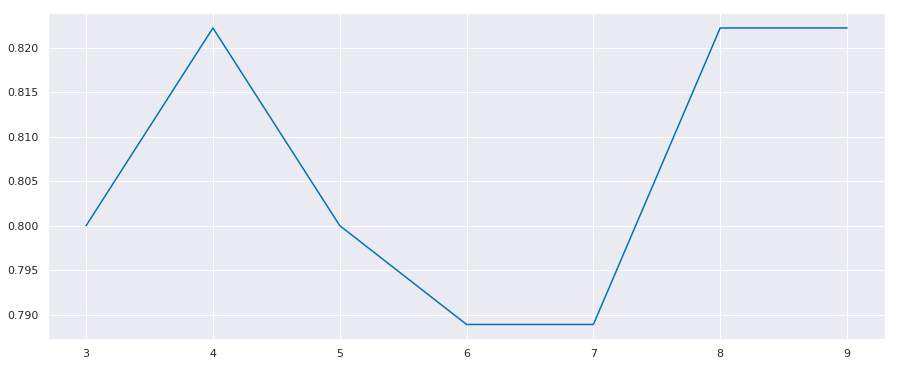

In [49]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [50]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


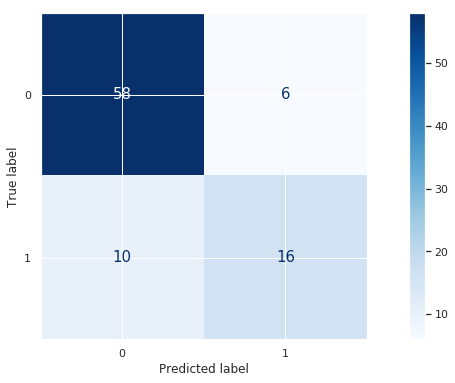

In [90]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()



## 3. Support Vector Machines

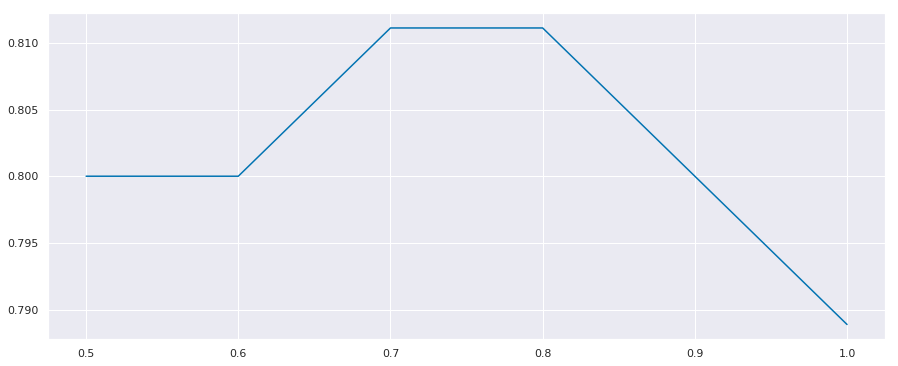

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [54]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.7, random_state=0)

In [55]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


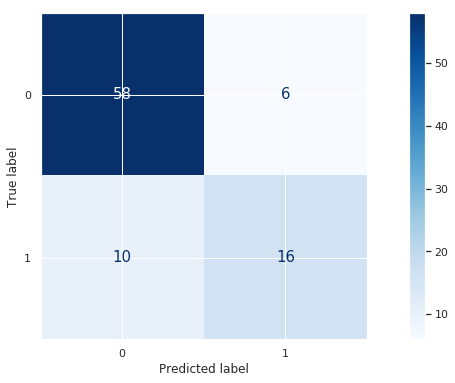

In [91]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()



## 4. DecisionTreeClassifier

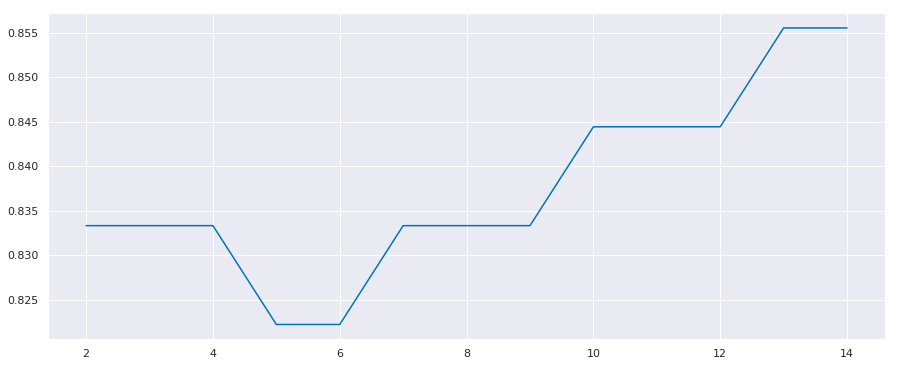

In [57]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [58]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [59]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


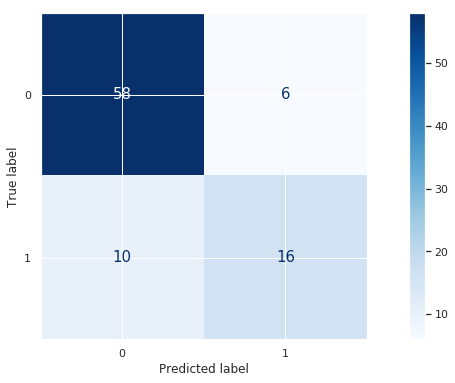

In [92]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()


## 5. RANDOM FOREST CLASSIFCATION

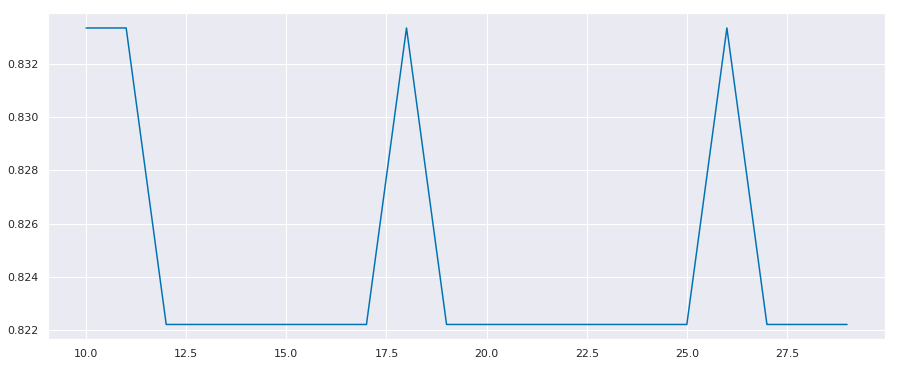

In [61]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [62]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [63]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


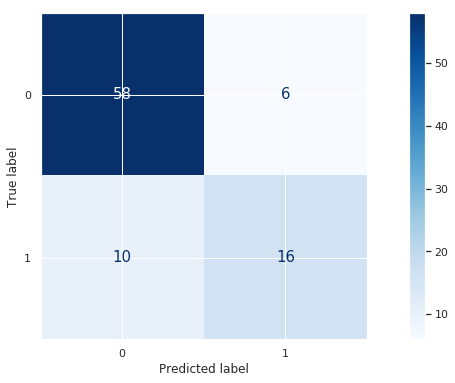

In [93]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()



## 6. ANN (neural network )

In [65]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

In [66]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [67]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [68]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [69]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [70]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [71]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [72]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.4638
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6763
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.7198
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.7295
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.7198
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6957
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6812
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6812
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6860
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6908
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8696
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8696
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8696
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8696
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8696
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2937 - accuracy: 0.8696
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8696
Epoch 90/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2894 - accuracy: 0.8696
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8744
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.8696
Epoch 93/100


In [73]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


Confusion Matrix
[[58  6]
 [10 16]]

Accuracy
0.8222222222222222


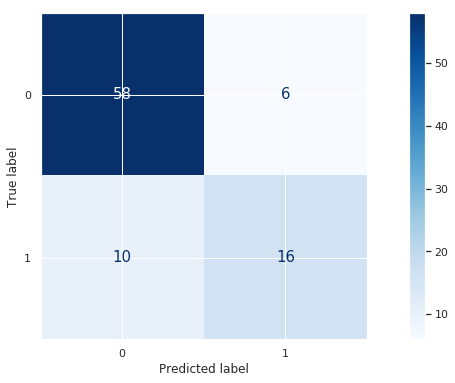

In [94]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()



## 7. xgboost 

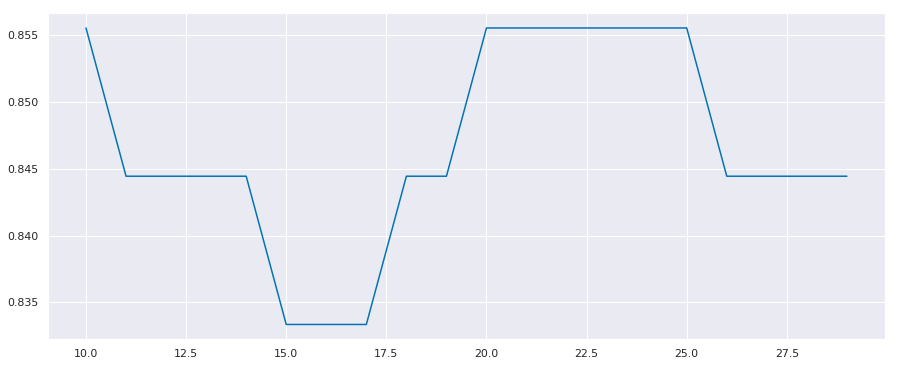

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [78]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


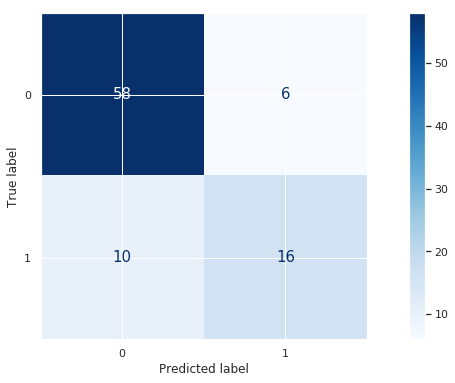

In [95]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

## 8. catboost

In [81]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005258
0:	learn: 0.6885755	total: 52.4ms	remaining: 52.4s
1:	learn: 0.6845689	total: 89.2ms	remaining: 44.5s
2:	learn: 0.6797374	total: 146ms	remaining: 48.5s
3:	learn: 0.6751841	total: 149ms	remaining: 37.1s
4:	learn: 0.6704762	total: 149ms	remaining: 29.7s
5:	learn: 0.6654219	total: 150ms	remaining: 24.8s
6:	learn: 0.6616297	total: 150ms	remaining: 21.3s
7:	learn: 0.6570249	total: 150ms	remaining: 18.6s
8:	learn: 0.6528310	total: 206ms	remaining: 22.7s
9:	learn: 0.6485887	total: 207ms	remaining: 20.5s
10:	learn: 0.6444676	total: 208ms	remaining: 18.7s
11:	learn: 0.6415687	total: 208ms	remaining: 17.1s
12:	learn: 0.6381855	total: 208ms	remaining: 15.8s
13:	learn: 0.6343571	total: 209ms	remaining: 14.7s
14:	learn: 0.6308915	total: 209ms	remaining: 13.7s
15:	learn: 0.6269104	total: 210ms	remaining: 12.9s
16:	learn: 0.6224642	total: 210ms	remaining: 12.1s
17:	learn: 0.6190664	total: 212ms	remaining: 11.5s
18:	learn: 0.6149146	total: 212ms	remaining: 10.9s
19:	learn

237:	learn: 0.2963614	total: 626ms	remaining: 2s
238:	learn: 0.2956316	total: 627ms	remaining: 2s
239:	learn: 0.2950546	total: 660ms	remaining: 2.09s
240:	learn: 0.2945408	total: 668ms	remaining: 2.1s
241:	learn: 0.2942800	total: 699ms	remaining: 2.19s
242:	learn: 0.2937939	total: 700ms	remaining: 2.18s
243:	learn: 0.2934414	total: 700ms	remaining: 2.17s
244:	learn: 0.2930555	total: 701ms	remaining: 2.16s
245:	learn: 0.2924239	total: 701ms	remaining: 2.15s
246:	learn: 0.2916827	total: 702ms	remaining: 2.14s
247:	learn: 0.2908662	total: 702ms	remaining: 2.13s
248:	learn: 0.2903111	total: 703ms	remaining: 2.12s
249:	learn: 0.2896909	total: 703ms	remaining: 2.11s
250:	learn: 0.2893788	total: 703ms	remaining: 2.1s
251:	learn: 0.2886804	total: 704ms	remaining: 2.09s
252:	learn: 0.2880090	total: 704ms	remaining: 2.08s
253:	learn: 0.2877480	total: 706ms	remaining: 2.07s
254:	learn: 0.2872014	total: 706ms	remaining: 2.06s
255:	learn: 0.2869470	total: 706ms	remaining: 2.05s
256:	learn: 0.286445

460:	learn: 0.2154405	total: 1.04s	remaining: 1.22s
461:	learn: 0.2152178	total: 1.08s	remaining: 1.26s
462:	learn: 0.2149367	total: 1.11s	remaining: 1.29s
463:	learn: 0.2147247	total: 1.16s	remaining: 1.34s
464:	learn: 0.2144565	total: 1.16s	remaining: 1.33s
465:	learn: 0.2142310	total: 1.16s	remaining: 1.33s
466:	learn: 0.2140480	total: 1.16s	remaining: 1.33s
467:	learn: 0.2136671	total: 1.17s	remaining: 1.32s
468:	learn: 0.2134991	total: 1.17s	remaining: 1.32s
469:	learn: 0.2132456	total: 1.17s	remaining: 1.31s
470:	learn: 0.2130117	total: 1.17s	remaining: 1.31s
471:	learn: 0.2128379	total: 1.17s	remaining: 1.31s
472:	learn: 0.2125718	total: 1.17s	remaining: 1.3s
473:	learn: 0.2124038	total: 1.17s	remaining: 1.3s
474:	learn: 0.2121911	total: 1.17s	remaining: 1.29s
475:	learn: 0.2119915	total: 1.17s	remaining: 1.29s
476:	learn: 0.2118113	total: 1.17s	remaining: 1.28s
477:	learn: 0.2114853	total: 1.17s	remaining: 1.28s
478:	learn: 0.2112451	total: 1.17s	remaining: 1.27s
479:	learn: 0.

639:	learn: 0.1805933	total: 1.45s	remaining: 815ms
640:	learn: 0.1803257	total: 1.45s	remaining: 812ms
641:	learn: 0.1801364	total: 1.45s	remaining: 809ms
642:	learn: 0.1799262	total: 1.45s	remaining: 806ms
643:	learn: 0.1798195	total: 1.45s	remaining: 803ms
644:	learn: 0.1796376	total: 1.45s	remaining: 800ms
645:	learn: 0.1795232	total: 1.46s	remaining: 800ms
646:	learn: 0.1791983	total: 1.46s	remaining: 797ms
647:	learn: 0.1790704	total: 1.46s	remaining: 794ms
648:	learn: 0.1789903	total: 1.46s	remaining: 790ms
649:	learn: 0.1787420	total: 1.46s	remaining: 787ms
650:	learn: 0.1785200	total: 1.46s	remaining: 784ms
651:	learn: 0.1783671	total: 1.46s	remaining: 780ms
652:	learn: 0.1781887	total: 1.46s	remaining: 777ms
653:	learn: 0.1779009	total: 1.46s	remaining: 774ms
654:	learn: 0.1777706	total: 1.47s	remaining: 772ms
655:	learn: 0.1774836	total: 1.47s	remaining: 769ms
656:	learn: 0.1772234	total: 1.47s	remaining: 766ms
657:	learn: 0.1769564	total: 1.47s	remaining: 763ms
658:	learn: 

934:	learn: 0.1377356	total: 2.19s	remaining: 152ms
935:	learn: 0.1376298	total: 2.19s	remaining: 150ms
936:	learn: 0.1375927	total: 2.19s	remaining: 147ms
937:	learn: 0.1373938	total: 2.19s	remaining: 145ms
938:	learn: 0.1371481	total: 2.19s	remaining: 142ms
939:	learn: 0.1370878	total: 2.19s	remaining: 140ms
940:	learn: 0.1369662	total: 2.21s	remaining: 138ms
941:	learn: 0.1368383	total: 2.21s	remaining: 136ms
942:	learn: 0.1366132	total: 2.21s	remaining: 133ms
943:	learn: 0.1365745	total: 2.21s	remaining: 131ms
944:	learn: 0.1364398	total: 2.21s	remaining: 128ms
945:	learn: 0.1362555	total: 2.21s	remaining: 126ms
946:	learn: 0.1360674	total: 2.21s	remaining: 124ms
947:	learn: 0.1359788	total: 2.21s	remaining: 121ms
948:	learn: 0.1358624	total: 2.21s	remaining: 119ms
949:	learn: 0.1357136	total: 2.21s	remaining: 116ms
950:	learn: 0.1355576	total: 2.21s	remaining: 114ms
951:	learn: 0.1354076	total: 2.21s	remaining: 111ms
952:	learn: 0.1352855	total: 2.21s	remaining: 109ms
953:	learn: 

In [82]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1]


[[58  6]
 [10 16]]
0.8222222222222222


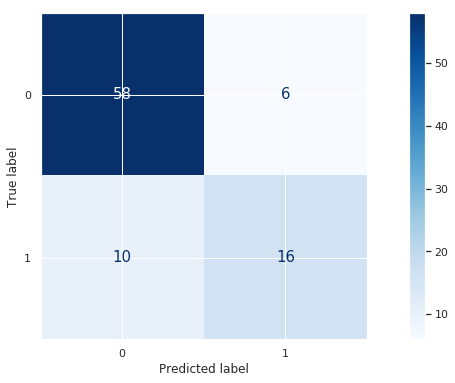

In [96]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [84]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'ANN',   
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

Model     Score
6                  xgboost  0.855556
7                 catboost  0.855556
5            Decision Tree  0.844444
2      Logistic Regression  0.822222
3            Random Forest  0.822222
0  Support Vector Machines  0.811111
4                      ANN  0.811111
1                      KNN  0.800000

## Comparing accurecy of all models

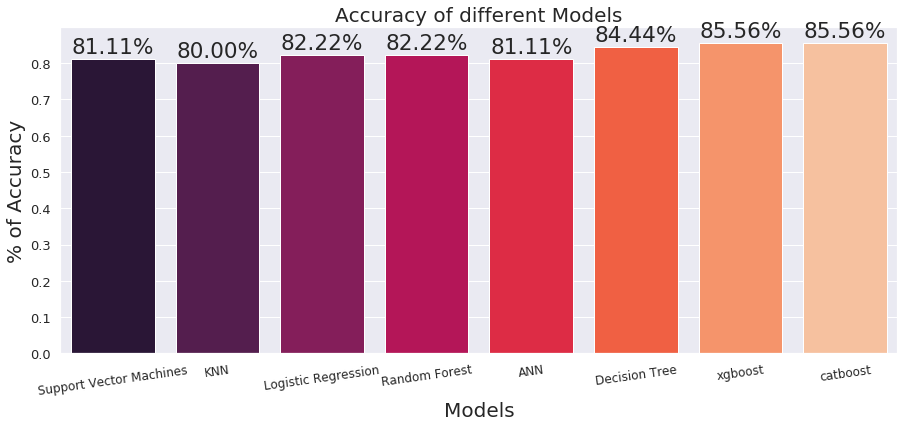

In [97]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## The best accurate models are catboost, xgboost and Decision Tree that can be used to dertermine the Heart failure prediction.